# Assignment 4
<br>*Last edit: 2/26/2021*

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# other things
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Prepare the data

In [2]:
# 
path = os.getcwd() + '\\data_categorized.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.504,0.0644,2,-14.754,0,0.0408,0.972,0.000004,0.174,0.403,106.994,181440,5
1,0.515,0.3390,7,-16.457,0,0.0283,0.823,0.317000,0.109,0.519,135.694,451733,3
2,0.500,0.2840,0,-15.590,1,0.0404,0.272,0.043200,0.120,0.576,93.724,332640,4
3,0.443,0.1040,0,-17.042,1,0.1010,0.913,0.000000,0.191,0.394,76.497,185160,4
4,0.419,0.2960,6,-14.721,1,0.0308,0.914,0.927000,0.193,0.121,111.452,498107,4


In [3]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((495, 13), (165, 13), (495,), (165,))

In [4]:
# Test many models
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [6]:
for model in classifiers:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_df = pd.DataFrame(conf_matrix)
    display(conf_df)
    print(classification_report(y_test, y_pred))

,0,1,2,3,4,5,6
0,12,4,4,2,4,1,0
1,6,6,0,4,0,2,1
2,7,2,5,0,3,2,1
3,4,5,0,15,5,0,1
4,4,10,2,3,7,2,0
5,6,7,1,2,3,2,0
6,4,5,4,3,0,2,2


                  precision    recall  f1-score   support

         country       0.28      0.44      0.34        27
dance-electronic       0.15      0.32      0.21        19
         hip-hop       0.31      0.25      0.28        20
            jazz       0.52      0.50      0.51        30
           metal       0.32      0.25      0.28        28
            punk       0.18      0.10      0.12        21
            rock       0.40      0.10      0.16        20

        accuracy                           0.30       165
       macro avg       0.31      0.28      0.27       165
    weighted avg       0.32      0.30      0.29       165



,0,1,2,3,4,5,6
0,0,0,0,0,0,0,27
1,0,0,0,0,0,0,19
2,0,0,0,0,0,0,20
3,0,0,0,0,0,0,30
4,0,0,0,0,0,0,28
5,0,0,0,0,0,0,21
6,0,0,0,0,0,0,20


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.00      0.00      0.00        19
         hip-hop       0.00      0.00      0.00        20
            jazz       0.00      0.00      0.00        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.12      1.00      0.22        20

        accuracy                           0.12       165
       macro avg       0.02      0.14      0.03       165
    weighted avg       0.01      0.12      0.03       165



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,27
1,0,0,0,0,0,0,19
2,0,0,0,0,0,0,20
3,0,0,0,0,0,0,30
4,0,0,0,0,0,0,28
5,0,0,0,0,0,0,21
6,0,0,0,0,0,0,20


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.00      0.00      0.00        19
         hip-hop       0.00      0.00      0.00        20
            jazz       0.00      0.00      0.00        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.12      1.00      0.22        20

        accuracy                           0.12       165
       macro avg       0.02      0.14      0.03       165
    weighted avg       0.01      0.12      0.03       165



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6
0,19,0,1,0,0,0,7
1,3,14,0,0,1,0,1
2,1,2,14,0,0,0,3
3,5,0,0,19,0,0,6
4,5,0,0,0,15,1,7
5,19,0,0,0,2,0,0
6,4,0,2,0,0,0,14


                  precision    recall  f1-score   support

         country       0.34      0.70      0.46        27
dance-electronic       0.88      0.74      0.80        19
         hip-hop       0.82      0.70      0.76        20
            jazz       1.00      0.63      0.78        30
           metal       0.83      0.54      0.65        28
            punk       0.00      0.00      0.00        21
            rock       0.37      0.70      0.48        20

        accuracy                           0.58       165
       macro avg       0.61      0.57      0.56       165
    weighted avg       0.62      0.58      0.57       165



,0,1,2,3,4,5,6
0,10,1,2,0,1,2,11
1,0,17,1,0,1,0,0
2,0,0,20,0,0,0,0
3,0,0,1,28,0,0,1
4,0,2,1,0,20,3,2
5,2,0,2,0,9,6,2
6,1,1,1,3,1,0,13


                  precision    recall  f1-score   support

         country       0.77      0.37      0.50        27
dance-electronic       0.81      0.89      0.85        19
         hip-hop       0.71      1.00      0.83        20
            jazz       0.90      0.93      0.92        30
           metal       0.62      0.71      0.67        28
            punk       0.55      0.29      0.37        21
            rock       0.45      0.65      0.53        20

        accuracy                           0.69       165
       macro avg       0.69      0.69      0.67       165
    weighted avg       0.70      0.69      0.67       165



,0,1,2,3,4,5,6
0,0,0,0,27,0,0,0
1,0,0,0,19,0,0,0
2,0,0,0,20,0,0,0
3,0,0,0,30,0,0,0
4,0,0,0,28,0,0,0
5,0,0,0,21,0,0,0
6,0,0,0,20,0,0,0


C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.00      0.00      0.00        19
         hip-hop       0.00      0.00      0.00        20
            jazz       0.18      1.00      0.31        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.00      0.00      0.00        20

        accuracy                           0.18       165
       macro avg       0.03      0.14      0.04       165
    weighted avg       0.03      0.18      0.06       165



,0,1,2,3,4,5,6
0,0,0,24,0,0,0,3
1,0,0,18,0,0,0,1
2,0,0,19,0,0,0,1
3,0,0,1,19,0,0,10
4,0,0,28,0,0,0,0
5,0,0,21,0,0,0,0
6,0,0,13,0,0,0,7


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.00      0.00      0.00        19
         hip-hop       0.15      0.95      0.26        20
            jazz       1.00      0.63      0.78        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.32      0.35      0.33        20

        accuracy                           0.27       165
       macro avg       0.21      0.28      0.20       165
    weighted avg       0.24      0.27      0.21       165



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6
0,8,1,8,0,2,7,1
1,0,18,0,1,0,0,0
2,4,3,9,0,0,1,3
3,0,1,2,24,0,0,3
4,6,3,3,0,5,10,1
5,3,3,1,0,4,10,0
6,4,3,7,3,0,0,3


                  precision    recall  f1-score   support

         country       0.32      0.30      0.31        27
dance-electronic       0.56      0.95      0.71        19
         hip-hop       0.30      0.45      0.36        20
            jazz       0.86      0.80      0.83        30
           metal       0.45      0.18      0.26        28
            punk       0.36      0.48      0.41        21
            rock       0.27      0.15      0.19        20

        accuracy                           0.47       165
       macro avg       0.45      0.47      0.44       165
    weighted avg       0.46      0.47      0.44       165



C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


,0,1,2,3,4,5,6
0,0,27,0,0,0,0,0
1,0,19,0,0,0,0,0
2,0,20,0,0,0,0,0
3,0,30,0,0,0,0,0
4,0,28,0,0,0,0,0
5,0,21,0,0,0,0,0
6,0,20,0,0,0,0,0


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.12      1.00      0.21        19
         hip-hop       0.00      0.00      0.00        20
            jazz       0.00      0.00      0.00        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.00      0.00      0.00        20

        accuracy                           0.12       165
       macro avg       0.02      0.14      0.03       165
    weighted avg       0.01      0.12      0.02       165



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6
0,12,1,1,0,0,6,7
1,0,18,0,0,1,0,0
2,1,0,19,0,0,0,0
3,0,0,0,29,0,0,1
4,0,1,0,0,19,5,3
5,5,0,0,0,5,11,0
6,2,2,0,1,0,0,15


                  precision    recall  f1-score   support

         country       0.60      0.44      0.51        27
dance-electronic       0.82      0.95      0.88        19
         hip-hop       0.95      0.95      0.95        20
            jazz       0.97      0.97      0.97        30
           metal       0.76      0.68      0.72        28
            punk       0.50      0.52      0.51        21
            rock       0.58      0.75      0.65        20

        accuracy                           0.75       165
       macro avg       0.74      0.75      0.74       165
    weighted avg       0.75      0.75      0.74       165



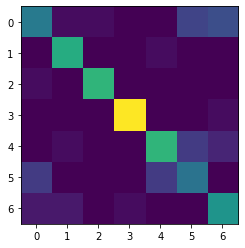

In [7]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)
plt.imshow(conf_df)
print(classification_report(y_test, y_pred))

,0,1,2,3,4,5,6
0,0,0,24,0,0,0,3
1,0,0,18,0,0,0,1
2,0,0,19,0,0,0,1
3,0,0,1,19,0,0,10
4,0,0,28,0,0,0,0
5,0,0,21,0,0,0,0
6,0,0,13,0,0,0,7


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.00      0.00      0.00        19
         hip-hop       0.15      0.95      0.26        20
            jazz       1.00      0.63      0.78        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.32      0.35      0.33        20

        accuracy                           0.27       165
       macro avg       0.21      0.28      0.20       165
    weighted avg       0.24      0.27      0.21       165



C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


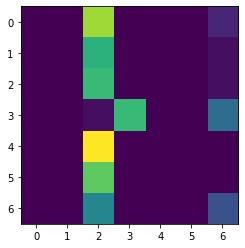

In [8]:
# AdaBoost Classifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)
plt.imshow(conf_df)
print(classification_report(y_test, y_pred))

C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\johna\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


,0,1,2,3,4,5,6
0,0,27,0,0,0,0,0
1,0,19,0,0,0,0,0
2,0,20,0,0,0,0,0
3,0,30,0,0,0,0,0
4,0,28,0,0,0,0,0
5,0,21,0,0,0,0,0
6,0,20,0,0,0,0,0


C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

         country       0.00      0.00      0.00        27
dance-electronic       0.12      1.00      0.21        19
         hip-hop       0.00      0.00      0.00        20
            jazz       0.00      0.00      0.00        30
           metal       0.00      0.00      0.00        28
            punk       0.00      0.00      0.00        21
            rock       0.00      0.00      0.00        20

        accuracy                           0.12       165
       macro avg       0.02      0.14      0.03       165
    weighted avg       0.01      0.12      0.02       165



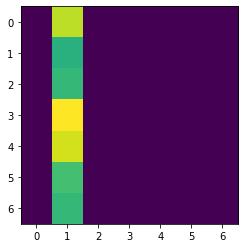

In [9]:
# Quadratic Discriminat Analysis
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)
plt.imshow(conf_df)
print(classification_report(y_test, y_pred))

In [10]:
# Testing categorizing between 3 different music genres, jazz, rock, and hip-hop.
# Our dataset contains approximately 100 songs from each genres.
path = os.getcwd() + '\\data_categorized_small.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.504,0.0644,2,-14.754,0,0.0408,0.972,0.000004,0.174,0.403,106.994,181440,5
1,0.515,0.3390,7,-16.457,0,0.0283,0.823,0.317000,0.109,0.519,135.694,451733,3
2,0.500,0.2840,0,-15.590,1,0.0404,0.272,0.043200,0.120,0.576,93.724,332640,4
3,0.443,0.1040,0,-17.042,1,0.1010,0.913,0.000000,0.191,0.394,76.497,185160,4
4,0.419,0.2960,6,-14.721,1,0.0308,0.914,0.927000,0.193,0.121,111.452,498107,4


In [11]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((225, 13), (76, 13), (225,), (76,))

,0,1,2
0,30,0,0
1,0,24,0
2,1,1,20


              precision    recall  f1-score   support

     hip-hop       0.97      1.00      0.98        30
        jazz       0.96      1.00      0.98        24
        rock       1.00      0.91      0.95        22

    accuracy                           0.97        76
   macro avg       0.98      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



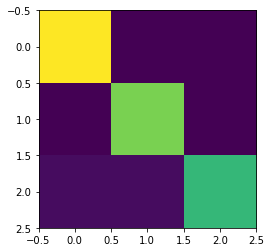

In [12]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)
plt.imshow(conf_df)
print(classification_report(y_test, y_pred))

,0,1,2
0,24,0,6
1,0,18,6
2,0,0,22


              precision    recall  f1-score   support

     hip-hop       1.00      0.80      0.89        30
        jazz       1.00      0.75      0.86        24
        rock       0.65      1.00      0.79        22

    accuracy                           0.84        76
   macro avg       0.88      0.85      0.84        76
weighted avg       0.90      0.84      0.85        76



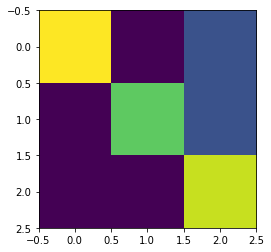

In [13]:
# AdaBoost Classifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)
plt.imshow(conf_df)
print(classification_report(y_test, y_pred))

,0,1,2
0,30,0,0
1,0,22,2
2,3,1,18


              precision    recall  f1-score   support

     hip-hop       0.91      1.00      0.95        30
        jazz       0.96      0.92      0.94        24
        rock       0.90      0.82      0.86        22

    accuracy                           0.92        76
   macro avg       0.92      0.91      0.92        76
weighted avg       0.92      0.92      0.92        76



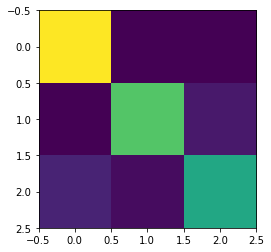

In [14]:
# Quadratic Discrimination Analysis
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)
plt.imshow(conf_df)
print(classification_report(y_test, y_pred))